# Project Overview

1. Business Goals
  - Find drivers for customer churn at Telco
    - Who churns and why...??
  - Construct a Machine Learning model that will accurately predict customer churn.<br><br>
  
2. Wrangle the Data
  - Examine the needed data on a MySQL database
  - Import and Cache the Data for use in a Jupyter Notebook
  - Clean and Tidy the Data<br><br>

3. Expore the Data for trends and relationships
  - More pertinent information is icluded here while there is also a reference `telco_exploration_notebook.ipynb` file with addition exploration for perusal
  - Separation of the Data into subsets, namely:
    - Train
    - Validate
    - Test
      - These isolated sets of data will be nescesary to show veracity and reproducability
  - Create and Test Hypothesies of trends, relationships, and correlations
  - Visualize the Data for better conceptualization of it<br><br>
  
4. Use the Data to train Machine Learning models
  - Evaluate the ML Models for accuracy and recall
  - Determine the best models and features through iterative processes
  - Bring these models to management<br>
  <br>
5. Conclusion
  - What are the key takeaways?
  - Did we find drviers of churn? Do our models work?
  - What steps might be taken to detect and prevent churn?
  - What's next? Is there more information to be gleaned?

#  Wrangle The Data!

In [1]:
# We need to import some libraries and functions
from telco_setup import telco_imports
telco_imports()


import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from modeling import confusion, random_forest_models
    


**We'll start with our imports**

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from modeling import confusion, random_forest_models

Prepared df: (7043, 16)

Train: (4057, 16)
Validate: (1409, 16)
Test: (1409, 16)


In [3]:
# Use the aqcuire file to get the data from MySQL or cache
df = acquire.get_telco_data()
# See if this is the right stuff
df.info() # Check √

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   internet_service_type  7043 non-null   object 
 9   online_security        7043 non-null   object 
 10  online_backup          7043 non-null   object 
 11  device_protection      7043 non-null   object 
 12  tech_support           7043 non-null   object 
 13  streaming_tv           7043 non-null   object 
 14  streaming_movies       7043 non-null   object 
 15  cont

In [4]:
# Seems there's nulls in these parts... must fix
df.total_charges.value_counts(dropna=False)

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

**We found NULLS!!**
  - Since the null values are in total charges and for customers that have tenure:0 we can move the monthly charges to them
    - Alternately, in future versions we may drop them entirely

In [5]:
# Pull out our trusty ol' .fix_nulls() from prepare.py
df = prepare.fix_nulls()

In [6]:
df.total_charges.value_counts(dropna=False) # Check √

20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6534, dtype: int64

In [7]:
train, validate, test = prepare.split_data(df, 'churn')

Prepared df: (7043, 22)

Train: (4225, 22)
Validate: (1409, 22)
Test: (1409, 22)


### Finally we have a Training Set, with a Validate and Test Set 

  - Exploration should be refined in the report because now you know which visualizations and tests led to valuable outcomes.
  
  

In [8]:
# Here we are going to start examining our training data 
# First let's print the commands to look at 
# every individual field and how it realates to churn
for i in train:
    print(f"sns.histplot(data=train, \
    y='{i}', hue='churn', multiple='stack')"
         )
    print(f"train['{i}'][df.churn == 'Yes'].value_counts()")
    print(f"train['{i}'][df.churn == 'No'].value_counts()")    

sns.histplot(data=train,     y='customer_id', hue='churn', multiple='stack')
train['customer_id'][df.churn == 'Yes'].value_counts()
train['customer_id'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='gender', hue='churn', multiple='stack')
train['gender'][df.churn == 'Yes'].value_counts()
train['gender'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='senior_citizen', hue='churn', multiple='stack')
train['senior_citizen'][df.churn == 'Yes'].value_counts()
train['senior_citizen'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='partner', hue='churn', multiple='stack')
train['partner'][df.churn == 'Yes'].value_counts()
train['partner'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='dependents', hue='churn', multiple='stack')
train['dependents'][df.churn == 'Yes'].value_counts()
train['dependents'][df.churn == 'No'].value_counts()
sns.histplot(data=train,     y='tenure', hue='churn', multiple='stack')
train['tenure'][df.

## Is there a difference in Churn rates based on Gender?
- Let's take a look...

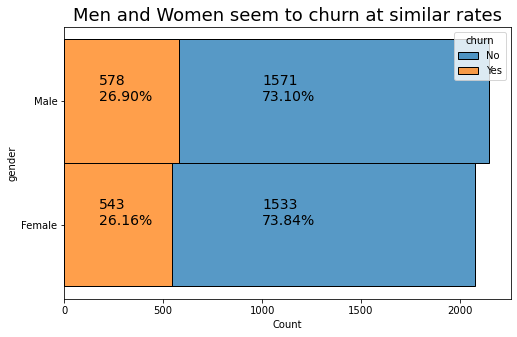

In [9]:
# Set the size of the figure for disply
plt.figure(figsize=(8,5))
# Use a histograph showing gender and the % of churn in each
sns.histplot(data=train, y='gender', hue='churn', multiple='stack')
# Always title plots, graphs, and charts
plt.title('Men and Women seem to churn at similar rates',
          fontdict={'fontsize':18}
         )
# numbers calculated from the .value_counts()
plt.text(175,'Male',f'578\n{Percent(578/(578+1571))}',fontdict={'fontsize':14})
plt.text(175,"Female", f'543\n{Percent(543/(543+1533))}',fontdict={'fontsize':14})
plt.text(1000,'Male', f'1571\n{Percent(1571/(578+1571))}',fontdict={'fontsize':14})
plt.text(1000,'Female', f'1533\n{Percent(1533/(543+1533))}',fontdict={'fontsize':14})
# Show the thing
plt.show()

##  That doesn't look like a difference... Is it?

In [10]:
males = train.churn[train.gender == 'Male'].map({'No':0,
                                                 'Yes':1
                                                })
# By dividing churn into male and female groups and mapping
# No churn and Yes churn to 0 and 1 respectively we can
# test the means of the different groups to see if they are different

females = train.churn[train.gender == 'Female'].map({'No':0,
                                                 'Yes':1
                                                })

## We'll make Hypotheses we can test!<br>
_______________
$Hₒ$ : There is no difference in churn of Males, vs churn of Females<br><br>
$Hₐ$ : Males churn in different amounts than Females churn
__________________________________________________________

### <br>Get the Means of the distributions
_____________

In [11]:
μ_males = males.mean()
μ_females = females.mean()

In [12]:
μ_females, μ_males

(0.2615606936416185, 0.26896230805025595)

**Set Alpha**

In [13]:
α = .05

**Verify Assumptions**

1. Independent Samples. YES! no observations in male sample exist in the female sample. 

2. Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT).  YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal, but let's use a levene test to find out).

In [14]:
tstat, pval = stats.levene(males, females)

tstat, pval

(0.2966476690943107, 0.5860204625545165)

**As fate would have it:** our varience seems similar

In [15]:
t,p = stats.ttest_ind(females, males)
t,p

(-0.5446537148448641, 0.5860204625544931)

### We **Cannot Reject** the $H_0$: Null hypothesis

## Do you think senior citizens make up much of the customer base?

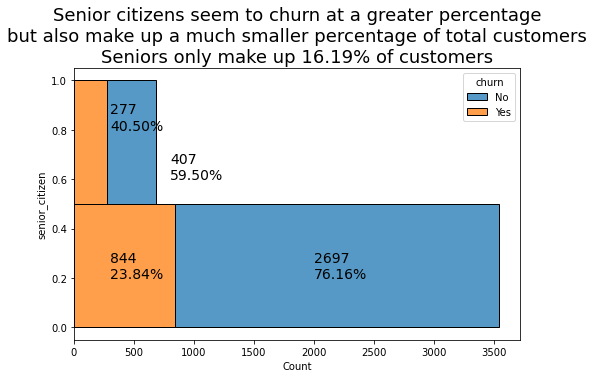

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data=train, y='senior_citizen', hue='churn', multiple='stack', bins=2)
# Use the Hist plot, looking at senior citzens, and hue of churn, stack for better color differentiation
plt.text(300,.8,f'277\n{Percent(277/(277+407))}',fontdict={'fontsize':14})
plt.text(800,.6,f'407\n{Percent(407/(277+407))}',fontdict={'fontsize':14})
plt.text(300,.2,f'844\n{Percent(844/(844+2697))}',fontdict={'fontsize':14})
plt.text(2000,.2,f'2697\n{Percent(2697/(844+2697))}',fontdict={'fontsize':14})
# All of the above numbers are taken from .value_counts(dropna=False) to catch any nulls we might have missed
plt.title(f'Senior citizens seem to churn at a greater percentage\n\
but also make up a much smaller percentage of total customers\n\
Seniors only make up {Percent((277+407)/(277+407+844+2697))} of customers',
          fontdict={'fontsize':18}
         )
plt.show()

## We'll make Hypotheses we can test!<br>
_______________
$Hₒ$ : There is no difference in churn of Seniors, vs churn of Not_Seniors_yet<br><br>
$Hₐ$ : Seniors churn in different amounts than Not_Seniors_Yet churn
__________________________________________________________

### <br>Get the Means of the distributions
_____________

In [17]:
seniors = train.churn[train.senior_citizen == 1].map({'No':0,
                                                 'Yes':1
                                                })
# By dividing churn into male and female groups and mapping
# No churn and Yes churn to 0 and 1 respectively we can
# test the means of the different groups to see if they are different

not_senior_yet = train.churn[train.senior_citizen == 0].map({'No':0,
                                                 'Yes':1
                                                })

In [18]:
μ_seniors = seniors.mean()
μ_not_senior_yet = not_senior_yet.mean()
μ_seniors, μ_not_senior_yet

(0.40497076023391815, 0.23835074837616493)

**Verify Assumptions**

1. Independent Samples. YES! no observations in seniors sample exist in the not_seniors_yet sample. 

2. Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT).  YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal, but let's use a levene test to find out).

In [19]:
tstat, pval = stats.levene(seniors, not_senior_yet)

tstat, pval

(83.21560907199049, 1.1134588331065843e-19)

### The Small p-value suggests they do not have equal varience

In [20]:
# We'll set our ttest to equal_var= False
t,p = stats.ttest_ind(seniors, not_senior_yet, equal_var= False)
t,p

(8.288704479313202, 4.1800740223813366e-16)

## We can safely: REJECT The Null $H_0$: Hypothesis
  - The t > 0 : True and p is near 0

# What about payment types?
  - Does this have an effect on churn?

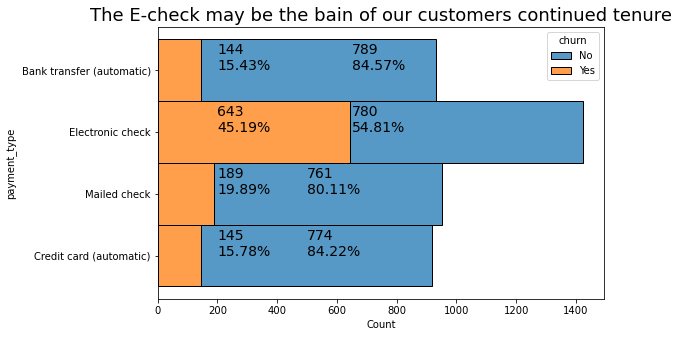

In [21]:
# We're doing the same things again here
plt.figure(figsize=(8,5))
sns.histplot(data=train, y='payment_type', hue='churn', multiple='stack')
plt.title('The E-check may be the bain of our customers continued tenure',
          fontdict={'fontsize':18}
         )
# Bank transfer (automatic)
plt.text(200, 'Bank transfer (automatic)', f'{144}\n{Percent(144/(144+789))}',fontdict={'fontsize':14})
plt.text(650, 'Bank transfer (automatic)', f'{789}\n{Percent(789/(144+789))}',fontdict={'fontsize':14})

# Electronic Check
plt.text(200, 'Electronic check', f'{643}\n{Percent(643/(643+780))}',fontdict={'fontsize':14})
plt.text(650, 'Electronic check', f'{780}\n{Percent(780/(643+780))}',fontdict={'fontsize':14})

# Mailed Check
plt.text(200, 'Mailed check', f'{189}\n{Percent(189/(189+761))}',fontdict={'fontsize':14})
plt.text(500, 'Mailed check', f'{761}\n{Percent(761/(189+761))}',fontdict={'fontsize':14})

# Credit Card
plt.text(200, 'Credit card (automatic)', f'{145}\n{Percent(145/(145+774))}',fontdict={'fontsize':14})
plt.text(500, 'Credit card (automatic)', f'{774}\n{Percent(774/(145+774))}',fontdict={'fontsize':14})

plt.show()

###  We can clearly see that E-check customers have the highest amout of churn<br><br>from everything we've seen so far.
  - This will probably be an important part of our model, and is likely a driver of churn
  - More questions need to be answered by our AR (accounts recievable) department
    - Have there been issues with the E-check system?
      - Is there a way to see what people do when they interact with the system?
    - Does billing send reminders?
    - Something is very different here...
    

## Do people with different types of Internet service Churn differently?

In [22]:
#  isty = internet service type where churn has (Yes) happened
isty = train['internet_service_type'][df.churn == 'Yes'].value_counts()
# isty # Check √ - Index = [0]: Fiber, [1]: DSL, [2]: None

# istn = internet service type where churn has (No[t]) happened
istn = train['internet_service_type'][df.churn == 'No'].value_counts()
# istn # Check √ - Index = [0]: DSL, [1]: Fiber, [2]: None

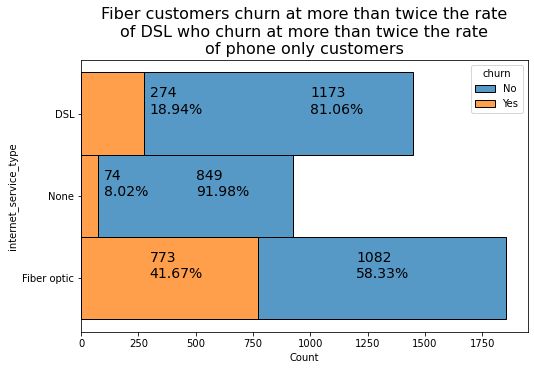

In [23]:
# plot the internet service type counts stacking churn and no churn
plt.figure(figsize=(8,5))
sns.histplot(data=train, y='internet_service_type', hue='churn', multiple='stack')
plt.title('Fiber customers churn at more than twice the rate\n\
of DSL who churn at more than twice the rate\nof phone only customers',fontdict={'fontsize':16})
# We can use the indexes to show percent of each service
#     Churn/Total in that service, and No churn/total
plt.text(300, 'DSL',f'{isty[1]}\n{Percent(isty[1]/(isty[1]+istn[0]))}',fontdict={'fontsize':14})
plt.text(1000, 'DSL',f'{istn[0]}\n{Percent(istn[0]/(isty[1]+istn[0]))}',fontdict={'fontsize':14})
plt.text(100, 'None',f'{isty[2]}\n{Percent(isty[2]/(isty[2]+istn[2]))}',fontdict={'fontsize':14})
plt.text(500, 'None',f'{istn[2]}\n{Percent(istn[2]/(isty[2]+istn[2]))}',fontdict={'fontsize':14})
plt.text(300, 'Fiber optic',f'{isty[0]}\n{Percent(isty[0]/(isty[0]+istn[1]))}',fontdict={'fontsize':14})
plt.text(1200, 'Fiber optic',f'{istn[1]}\n{Percent(istn[1]/(isty[0]+istn[1]))}',fontdict={'fontsize':14})
plt.show()

# Wow... Aside from E-checks <br><br>Fiber customers seem to Churn more than anyone else...
  - What is **happening** here??
  - Maybe looking at more aspects of this could help<br><br>
  
# Can we look at the tenure and total charges of these groups?

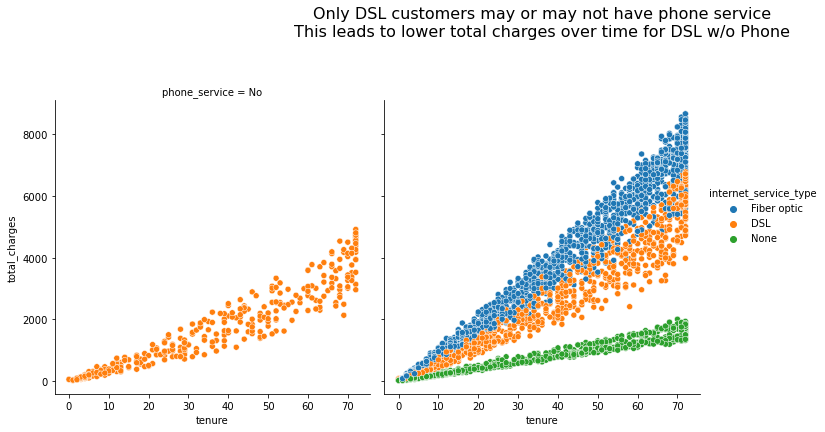

In [24]:
sns.relplot(data=train, 
            x='tenure', 
            y='total_charges', 
            hue='internet_service_type',
            hue_order=['Fiber optic', 'DSL', 'None'], 
            col='phone_service'
           )
plt.title('Only DSL customers may or may not have phone service\n\
This leads to lower total charges over time for DSL w/o Phone',
             y=1.2,
             fontdict= {'fontsize':16}
            )
plt.show()

## Interesting insight... where are the Fiber customers w/o Phone Service?

In [25]:
# lets look at the percentage of DSL customers with and without Phone service
DSLy = len(train.internet_service_type[(train.internet_service_type == 'DSL')\
                            & (train.phone_service == 'Yes')])
DSLn = len(train.internet_service_type[(train.internet_service_type == 'DSL')\
                            & (train.phone_service == 'No')])
# Now that we have the numbers we can divide by the total DSL customers to find out
print(f'''
People with DSL + Phone make up: {Percent(DSLy/(DSLy+DSLn))} of DSL customers

While those with DSL and No Phone: {Percent(DSLn/(DSLy+DSLn))}
''')


People with DSL + Phone make up: 72.84% of DSL customers

While those with DSL and No Phone: 27.16%



In [26]:
# Here we'll do the same thing to look at Fiber customers
train.internet_service_type[(train.internet_service_type == 'Fiber optic')\
                            & (train.phone_service == 'No')]
print(f'''
People with Fiber + Phone make up: 100% of Fiber customers

While those with Fiber and No Phone: 0%
''')


People with Fiber + Phone make up: 100% of Fiber customers

While those with Fiber and No Phone: 0%



## Questions I have
####  - Are people with Fiber optic forced to have phone service also?
####    - The DSL group has over a quater (27.16%) of users with no phone,<br> and Fiber optic customers have phone service 100% of the time

# Let's break these up again<br><br> to visualize the difference in churn

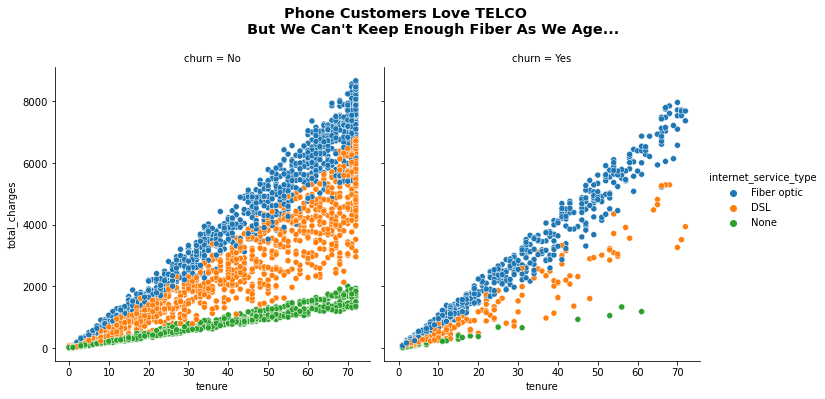

In [27]:
sns.relplot(data=train, 
            x='tenure', 
            y='total_charges', 
            hue='internet_service_type',
            hue_order=['Fiber optic', 'DSL', 'None'], 
            col='churn'
           ).fig.suptitle('Phone Customers Love TELCO\n\
           But We Can\'t Keep Enough Fiber As We Age...' ,
               fontsize = 'x-large' , 
               fontweight = 'bold' ,
                y= 1.1
                         )

plt.show()

# This really shows across the spectrum that:

1. Fiber customers churn early, 
2. often, and
3. consitently throughout tenure!

### And begs more questions for those with more domain knowledge
  - Was there an outage that caused a bunch of these people to churn?
  - Did they all churn around the same date?
  - Are people with Fiber paying for bundled Phone Service we won't let them out of?

  - Include your 3 best models in the final notebook to review. Show the steps and code you went through to fit the models, evaluate, and select.

# Let's move on to some Models!
1. First we'll prep the data for modeling
  - Change all the columns to numeric, encoding fields as necessary
  - Dropping some of the columns we've already determined aren't related to churn
    - `gender`, `streaming_tv`, `streaming_movies`

In [28]:
# re-prepare the data for modeling this time
df = prepare.fix_nulls()
df = prepare.prep_telco_1(df)
train, validate, test = prepare.split_data_model(df, 'churn1')

Prepared df: (7043, 16)

Train: (4057, 16)
Validate: (1409, 16)
Test: (1409, 16)


In [29]:
# set the X_columns and the y_column
X_cols = train.columns.to_list()
X_cols.remove('churn1')
y_col = 'churn1'

In [30]:
X_cols

['senior',
 'partner',
 'dependents',
 'tenure',
 'e_bill',
 'monthly_charges',
 'total_charges',
 'DSL',
 'Fiber',
 'one_year',
 'two_year',
 'bank_transfer',
 'cc',
 'e_check',
 'add_ons']

In [31]:
y_col

'churn1'

In [32]:
# Use our X and y columns for training, validation, and testing sets
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

## Establish the baseline assumption:
  - Lol, no one Churns

In [33]:
# Let's find our baseline 
int(y_train.mode())

0

###  We'll build a function to make a number of differing models<br>and evaluate them at the same time

In [34]:
def random_forest_models(num_models, rand_st=123, positive=1, max_samp=1.0, trees=100):
    '''
    random_forest_models is a function that:
        
        Takes in:   num_models=  >> The number of rf models 
                                  you want to create  ;dtype(int)
                       rand_st=  >> Random State  
                                  ;dtype(int) = 123 unless specified
                      positive=  >> what is the positive test 
                                  (0 or 1)
                      max_samp=  >> maximum samples per tree
                                  ;dtype(int, float) = (default)1.0
                                  if int: = number of samples
                                  if float: = percentage of total samples
                         trees=  >> n_estimators: number of trees in the forest
        
Assumed variables apply:
    
                  train: training dataset
               validate: validate dataset
                   test: test dataset

                 X_cols = df.columns.drop('target_y').to_list()
                  y_col = 'target_y'

                X_train = train[X_cols]
                y_train = train[y_col]
                  X_val = validate[X_cols]
                  y_val = validate[y_col]
                 X_test = test[X_cols]
                 y_test = test[y_col]
                 
        Returns: a DataFrame with predictions for each model
    '''
    b = int(y_train.mode())
    preds = pd.DataFrame({
    'actual': y_train,
    'baseline': b,
    })
    TN, FP, FN, TP = confusion_matrix(preds.actual, preds.baseline).ravel()
    print(f'''\nBaseline vs. Actual\n\n\
    True Positive = {TP} ----  False Positive = {FP}
    True Negative = {TN} ----  False Negative = {FN}
    
    Accuracy = {Percent((TN+TP)/(TN+TP+FN+FP))}
    Recall   = {TP/(TP+FN):.2%}
    ''')
#     confusion(TN=TN, TP=TP, FN=FN, FP=FP)
    depth = 11 #num_models * 2 + 1
#     fig, ax = plt.subplot(nrows = num_models,n)
    for i in range(1, num_models+1):
        depth -= 1
        name = f'model_{i}_depth_{depth}'
        
        rf = RandomForestClassifier(random_state = rand_st, 
                                    min_samples_leaf = i, 
                                    max_depth = depth,
                                    max_samples = max_samp,
                                    n_estimators = trees
                                   )
        rf.fit(X_train, y_train)
        
        preds[name] = rf.predict(X_train)
#         val_name = f'{name}_validate'
        TN, FP, FN, TP = confusion_matrix(preds.actual, preds[name]).ravel()
        print(f'\n{name}\n\n {rf}')
        confusion(TN=TN, TP=TP, FN=FN, FP=FP)
        print(f'Validation score is: {rf.score(X_validate, y_validate):.2%}')
        print('______________________________')
#         preds[val_name] = rf.predict(X_val)
#         plt.subplot(i,i,12)
#         plt.title(f'{name} feature importances')
#         plt.barh(X_train.columns, rf.feature_importances_)
#         plt.show
                
    return preds

## We see right away that:<br> Baseline Accuracy is about: 73%<br>Baseline Recall is: 0.00%

### We want better accuracy than that for our models<br><br>Additionally, Recall may be what we want to look for
- Since we want to find out who IS churning, let's minimize our misses
- bigest problem with baseline, is the Recall: 0.00%

In [35]:
# use the thing!
preds = random_forest_models(9)


Baseline vs. Actual

    True Positive = 0 ----  False Positive = 0
    True Negative = 2943 ----  False Negative = 1114
    
    Accuracy = 72.54%
    Recall   = 0.00%
    

model_1_depth_10

 RandomForestClassifier(max_depth=10, max_samples=1.0, random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 779 ---- False Positive = 167
    True Negative = 2776 ---- False Negative = 335
    
    Out of 4057 predictions -- Correct predictions = 3555 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1114 ---- PREDICTED POSITIVE = (TP + FP) = 946
    
    REAL NEGATIVE = (TN + FP) = 2943 ---- PREDICTED NEGATIVE = (TN + FN) = 3111
     
        Accuracy = 87.63% -->> Correct Predictions / Total Predictions
       Precision = 82.35% -->> True Positive / Predicted Positive
             NPV = 89.23% -->> True Negative / Predicted Negative
          Recall = 69.93% -->> True Positive / Real Positive
     Spec


model_9_depth_2

 RandomForestClassifier(max_depth=2, max_samples=1.0, min_samples_leaf=9,
                       random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 143 ---- False Positive = 37
    True Negative = 2906 ---- False Negative = 971
    
    Out of 4057 predictions -- Correct predictions = 3049 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1114 ---- PREDICTED POSITIVE = (TP + FP) = 180
    
    REAL NEGATIVE = (TN + FP) = 2943 ---- PREDICTED NEGATIVE = (TN + FN) = 3877
     
        Accuracy = 75.15% -->> Correct Predictions / Total Predictions
       Precision = 79.44% -->> True Positive / Predicted Positive
             NPV = 74.95% -->> True Negative / Predicted Negative
          Recall = 12.84% -->> True Positive / Real Positive
     Specificity = 98.74% -->> True Negative / Real Negative
        f1-score = 22.10% -->> Harmonic Mean of Precision and Recall
    __________

# The bes model so far...
## About 80% Validation accuracy score<br>And almost 59% Recall 
model_3_depth_8

 RandomForestClassifier(max_depth=8, max_samples=1.0, min_samples_leaf=3,
                       random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 657 ---- False Positive = 250
    True Negative = 2693 ---- False Negative = 457
    
    Out of 4057 predictions -- Correct predictions = 3350 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1114 ---- PREDICTED POSITIVE = (TP + FP) = 907
    
    REAL NEGATIVE = (TN + FP) = 2943 ---- PREDICTED NEGATIVE = (TN + FN) = 3150
     
        Accuracy = 82.57% -->> Correct Predictions / Total Predictions
       Precision = 72.44% -->> True Positive / Predicted Positive
             NPV = 85.49% -->> True Negative / Predicted Negative
          Recall = 58.98% -->> True Positive / Real Positive
     Specificity = 91.51% -->> True Negative / Real Negative
        f1-score = 65.02% -->> Harmonic Mean of Precision and Recall
    _______________________________________________________________________________________
    
Validation score is: 80.48%
______________________________


# Try it showing full confusion for Validate

### 55% Recall on the Validate set... can we do better??

In [36]:
rf_try_2 = RandomForestClassifier(max_depth=8, max_samples=1.0, min_samples_leaf=3,
                       n_estimators=100, random_state=123)

rf_try_2.fit(X_train,y_train)

pred_try_2_train = rf_try_2.predict(X_train)

pred_try_2_validate = rf_try_2.predict(X_validate)

TN, FP, FN, TP = confusion_matrix(y_train, pred_try_2_train).ravel()
print(f'\nTrain on \n\n{rf_try_2}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, pred_try_2_validate).ravel()
print(f'\nValidate on \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)


Train on 

RandomForestClassifier(max_depth=8, max_samples=1.0, min_samples_leaf=3,
                       random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 657 ---- False Positive = 250
    True Negative = 2693 ---- False Negative = 457
    
    Out of 4057 predictions -- Correct predictions = 3350 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1114 ---- PREDICTED POSITIVE = (TP + FP) = 907
    
    REAL NEGATIVE = (TN + FP) = 2943 ---- PREDICTED NEGATIVE = (TN + FN) = 3150
     
        Accuracy = 82.57% -->> Correct Predictions / Total Predictions
       Precision = 72.44% -->> True Positive / Predicted Positive
             NPV = 85.49% -->> True Negative / Predicted Negative
          Recall = 58.98% -->> True Positive / Real Positive
     Specificity = 91.51% -->> True Negative / Real Negative
        f1-score = 65.02% -->> Harmonic Mean of Precision and Recall
    ________________

# We try Logistic Regression models and get:

## Up to almost 56% Recall on Validate, but only 53% on Training<br><br>This doesn't feel like improvement

In [37]:
# Build it
logit = LogisticRegression(random_state=123, C=1.0, solver='liblinear', penalty='l1')
# Fit it
logit.fit(X_train, y_train)
# Use it
y_pred = logit.predict(X_train)
y_pred
# Validate
y_pred1 = logit.predict(X_validate)
y_pred1
# Evaluate
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
print(f'\nTrain on \n\n{rf_try_2}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, y_pred1).ravel()
print(f'\nValidate on ') # \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)


Train on 

RandomForestClassifier(max_depth=8, max_samples=1.0, min_samples_leaf=3,
                       random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 594 ---- False Positive = 316
    True Negative = 2627 ---- False Negative = 520
    
    Out of 4057 predictions -- Correct predictions = 3221 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1114 ---- PREDICTED POSITIVE = (TP + FP) = 910
    
    REAL NEGATIVE = (TN + FP) = 2943 ---- PREDICTED NEGATIVE = (TN + FN) = 3147
     
        Accuracy = 79.39% -->> Correct Predictions / Total Predictions
       Precision = 65.27% -->> True Positive / Predicted Positive
             NPV = 83.48% -->> True Negative / Predicted Negative
          Recall = 53.32% -->> True Positive / Real Positive
     Specificity = 89.26% -->> True Negative / Real Negative
        f1-score = 58.70% -->> Harmonic Mean of Precision and Recall
    ________________

# Let's see if there's anything in here we could drop...

## What if we Train the models with less noise?<br><br>I'm dropping all customers from training that aren't Fiber!

In [38]:
X_train

,senior,partner,dependents,tenure,e_bill,monthly_charges,total_charges,DSL,Fiber,one_year,two_year,bank_transfer,cc,e_check,add_ons
5911,0,0,1,26,1,39.95,1023.75,1,0,1,0,1,0,0,1
2479,0,1,0,47,0,26.90,1250.85,0,0,1,0,0,0,1,0
5889,0,0,0,1,1,50.45,50.45,1,0,0,0,0,0,0,1
6087,0,0,0,69,1,60.05,4176.70,1,0,0,1,1,0,0,3
785,0,0,0,51,0,87.55,4475.90,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,1,1,1,60,1,80.95,4859.10,0,1,0,0,0,0,1,1
6102,0,1,0,2,0,79.70,165.00,0,1,0,0,1,0,0,2
356,1,0,0,52,1,50.50,2566.30,1,0,0,0,0,0,1,3
1756,0,0,0,4,1,70.20,237.95,0,1,0,0,0,0,1,0


In [39]:
# New training set! Only Fiber
# Smaller dataset, but way more representative of those that churn?
X_train_fiber = X_train[X_train.Fiber == 1]
X_train_fiber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850 entries, 785 to 1756
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior           1850 non-null   int64  
 1   partner          1850 non-null   int64  
 2   dependents       1850 non-null   int64  
 3   tenure           1850 non-null   int64  
 4   e_bill           1850 non-null   int64  
 5   monthly_charges  1850 non-null   float64
 6   total_charges    1850 non-null   float64
 7   DSL              1850 non-null   uint8  
 8   Fiber            1850 non-null   uint8  
 9   one_year         1850 non-null   uint8  
 10  two_year         1850 non-null   uint8  
 11  bank_transfer    1850 non-null   uint8  
 12  cc               1850 non-null   uint8  
 13  e_check          1850 non-null   uint8  
 14  add_ons          1850 non-null   int64  
dtypes: float64(2), int64(6), uint8(7)
memory usage: 142.7 KB


In [40]:
#  We'll have to drop the y rows from training that we did from X
y_train_fiber = y_train
y_train_fiber

5911    0
2479    0
5889    1
6087    0
785     0
       ..
5269    0
6102    1
356     0
1756    1
2127    0
Name: churn1, Length: 4057, dtype: int64

In [41]:
# This should work...
y_train_fiber.drop(index=X_train[X_train.Fiber != 1].index.tolist(), inplace=True)

In [42]:
y_train_fiber

785     0
3057    0
5757    1
3465    1
1539    0
       ..
4308    0
4998    0
5269    0
6102    1
1756    1
Name: churn1, Length: 1850, dtype: int64

In [43]:
logit = LogisticRegression(random_state=123, C=1.0, solver='liblinear', penalty='l1')

logit.fit(X_train_fiber, y_train_fiber)

y_pred = logit.predict(X_train_fiber)
# y_pred # Check √

y_pred_validate = logit.predict(X_validate)
# y_pred_validate # Check √

y_pred_test = logit.predict(X_test)
# y_pred_test # Check √

TN, FP, FN, TP = confusion_matrix(y_train_fiber, y_pred).ravel()
print(f'\nTrain Scores: \n\n{rf_try_2}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, y_pred_validate).ravel()
print(f'\nValidate Scores: ') # \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)

TNt, FPt, FNt, TPt = confusion_matrix(y_test, y_pred_test).ravel()
print(f'\nTest Scores:') # \n\n {rf_try_2}')
confusion(TN=TNt, TP=TPt, FN=FNt, FP=FPt)


Train Scores: 

RandomForestClassifier(max_depth=8, max_samples=1.0, min_samples_leaf=3,
                       random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 533 ---- False Positive = 263
    True Negative = 815 ---- False Negative = 239
    
    Out of 1850 predictions -- Correct predictions = 1348 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 772 ---- PREDICTED POSITIVE = (TP + FP) = 796
    
    REAL NEGATIVE = (TN + FP) = 1078 ---- PREDICTED NEGATIVE = (TN + FN) = 1054
     
        Accuracy = 72.86% -->> Correct Predictions / Total Predictions
       Precision = 66.96% -->> True Positive / Predicted Positive
             NPV = 77.32% -->> True Negative / Predicted Negative
          Recall = 69.04% -->> True Positive / Real Positive
     Specificity = 75.60% -->> True Negative / Real Negative
        f1-score = 67.98% -->> Harmonic Mean of Precision and Recall
    _____________

## And there we have it...
### This regression model gives us:
  - Training Recall of 69% - The highest seen yet
  
### Out-of-sample: <br>Recall:<br>    Validate: 64.44%<br>     Test:  68.45%
  

  - On your best model, a chart visualizing how it performed on test would be valuable.

#  Conclusion:

# What are some of our takeaways thus far?

  - Things that aren't related to churn...
    - gender - they churn evenly
      - Can probably drop this field and not use it as a feature
    - phone servie
      - Everyone has phone service except a portion of the DSL customers
    - multiple lines
      - Multiple lines seems to line up with the DSL customers that do have phone
  - Things that don't matter much...
    - senior citizens - don't make up a great deal of customers
    - Streaming_tv
    - Streaming_movies
  - Things that seem to have a relationship to churn...
    - partner - no partner has more churn
    - dependents - no dependents has more churn
    - Fiber - DSL - No ISP 42%/19%/8% Churn
    - online backup      - not having leads to churn
    - online security    - not having leads to churn
    - device protection  - not having leads to churn
    - tech support       - not having leads to churn
    - Electronic check seems to be the LARGEST indicator of churn
      - 45% of customers using E-checks churn

#  What do we do about Fiber customers and E-Checks?
1. We need to find out more information:
2. Recomend looking into allowing Fiber customers to drop phone service
3. Recomend checking service reliability with Fiber
4. Recomend checking E-check system for bugs/ usability
5. Recomend one month discount to anyone that will switch from E-check to automated payments


# What's next?

1. We can look into monthly charges of segments of the customer base, control for internet types, and phone services
2. We can look further into Modeling for churn in other distinct classes of customers


Final Cell
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

In [44]:
y_prob_test = logit.predict_proba(X_test)
y_prob_test = pd.DataFrame(y_prob_test, index=X_test.index)
y_prob_test

,0,1
3160,0.848492,0.151508
1577,0.986476,0.013524
6823,0.329168,0.670832
3615,0.470280,0.529720
882,0.241437,0.758563
...,...,...
1097,0.353367,0.646633
6441,0.317763,0.682237
5985,0.995512,0.004488
2452,0.998734,0.001266


In [45]:
y_pred_test = logit.predict(X_test)
y_pred_test = pd.Series(y_pred_test, index= X_test.index)
y_pred_test

3160    0
1577    0
6823    1
3615    1
882     1
       ..
1097    1
6441    1
5985    0
2452    0
983     1
Length: 1409, dtype: int64

In [46]:
X_test

,senior,partner,dependents,tenure,e_bill,monthly_charges,total_charges,DSL,Fiber,one_year,two_year,bank_transfer,cc,e_check,add_ons
3160,0,1,1,51,1,95.15,5000.05,0,1,1,0,0,0,0,2
1577,0,1,0,65,0,71.00,4386.20,1,0,0,1,1,0,0,3
6823,0,0,0,18,1,96.05,1740.70,0,1,0,0,0,0,1,1
3615,0,0,0,25,1,105.50,2686.05,0,1,0,0,0,0,1,3
882,1,0,0,4,1,88.85,372.45,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0,0,0,2,0,76.40,160.80,1,0,0,0,0,0,1,2
6441,0,0,0,1,1,45.70,45.70,1,0,0,0,0,0,0,0
5985,0,0,0,67,1,25.60,1790.35,0,0,0,1,1,0,0,0
2452,0,1,1,72,0,38.50,2763.00,1,0,0,1,0,1,0,3


In [47]:
test_csv = pd.concat([X_test, y_pred_test, y_prob_test], axis=1)
test_csv

,senior,partner,dependents,tenure,e_bill,monthly_charges,total_charges,DSL,Fiber,one_year,two_year,bank_transfer,cc,e_check,add_ons,0,0,1
3160,0,1,1,51,1,95.15,5000.05,0,1,1,0,0,0,0,2,0,0.848492,0.151508
1577,0,1,0,65,0,71.00,4386.20,1,0,0,1,1,0,0,3,0,0.986476,0.013524
6823,0,0,0,18,1,96.05,1740.70,0,1,0,0,0,0,1,1,1,0.329168,0.670832
3615,0,0,0,25,1,105.50,2686.05,0,1,0,0,0,0,1,3,1,0.470280,0.529720
882,1,0,0,4,1,88.85,372.45,0,1,0,0,0,0,1,1,1,0.241437,0.758563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,0,0,0,2,0,76.40,160.80,1,0,0,0,0,0,1,2,1,0.353367,0.646633
6441,0,0,0,1,1,45.70,45.70,1,0,0,0,0,0,0,0,1,0.317763,0.682237
5985,0,0,0,67,1,25.60,1790.35,0,0,0,1,1,0,0,0,0,0.995512,0.004488
2452,0,1,1,72,0,38.50,2763.00,1,0,0,1,0,1,0,3,0,0.998734,0.001266


In [48]:
test_csv.columns.to_list()

['senior',
 'partner',
 'dependents',
 'tenure',
 'e_bill',
 'monthly_charges',
 'total_charges',
 'DSL',
 'Fiber',
 'one_year',
 'two_year',
 'bank_transfer',
 'cc',
 'e_check',
 'add_ons',
 0,
 0,
 1]

In [49]:
df = acquire.get_telco_data()

In [50]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type',
       'paperless_billing', 'payment_type', 'monthly_charges', 'total_charges',
       'churn'],
      dtype='object')

In [51]:
df_test = df[df.index.isin(test_csv.index)]

In [52]:
test_out = pd.concat([df_test, test_csv], axis=1)

In [53]:
test_out_1 = test_out.drop(columns=['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type',
 'paperless_billing',
 'payment_type',
 'monthly_charges',
 'total_charges',
 'churn','senior',
 'partner',
 'dependents',
 'tenure',
 'e_bill',
 'monthly_charges',
 'total_charges',
 'DSL',
 'Fiber',
 'one_year',
 'two_year',
 'bank_transfer',
 'cc',
 'e_check',
 'add_ons'])

In [54]:
test_out_1.columns.to_list()

['customer_id', 0, 0, 1]

In [55]:
test_out_1.columns = ['customer_id', 'prediction_of_churn', 'prob_no', 'probability_of_churn']

In [56]:
predictions = test_out_1.drop(columns='prob_no')
predictions

,customer_id,prediction_of_churn,probability_of_churn
5,0013-MHZWF,1,0.599701
6,0013-SMEOE,0,0.090866
11,0017-IUDMW,0,0.098053
17,0021-IKXGC,1,0.781394
22,0027-KWYKW,1,0.620366
...,...,...,...
7029,9972-NKTFD,0,0.157790
7031,9974-JFBHQ,0,0.183416
7032,9975-GPKZU,0,0.008284
7036,9985-MWVIX,1,0.647994


In [57]:
# predictions.to_csv('predictions.csv', index=False)